In [19]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('concrete_data.csv')

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
# train test split 
x = df.drop(columns=['Strength'])
y = df.loc[:, 'Strength']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [24]:
# Testing without transformation

clf = LinearRegression()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print(r2_score(y_test, pred))


print(np.mean(cross_val_score(estimator=clf, X=x_train, y=y_train, cv=10)))

0.6275531792314848
0.5894185601991604


In [27]:
# Testing with Scaling

obj = StandardScaler()
x_train_scaled = obj.fit_transform(x_train)
x_test_scaled = obj.transform(x_test)

clf = LinearRegression()
clf.fit(x_train_scaled, y_train)
pred = clf.predict(x_test_scaled)
print(r2_score(y_test, pred))

print(np.mean(cross_val_score(estimator=clf, X=x_train_scaled, y=y_train,cv=10)))

0.6275531792314851
0.5894185601991603


In [46]:
# Applying Box-Cox transformer

bc = PowerTransformer(method='box-cox')
x_train_transformed = bc.fit_transform(x_train+0.000001)
x_test_transformed = bc.transform(x_test+0.000001)          #-------------------

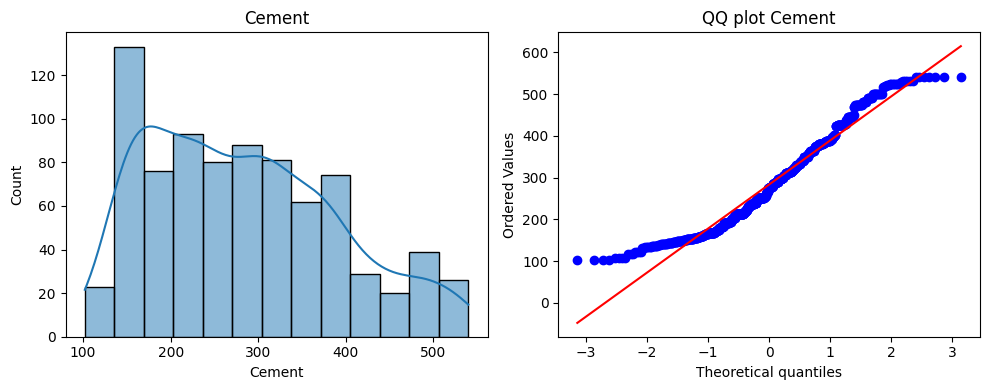

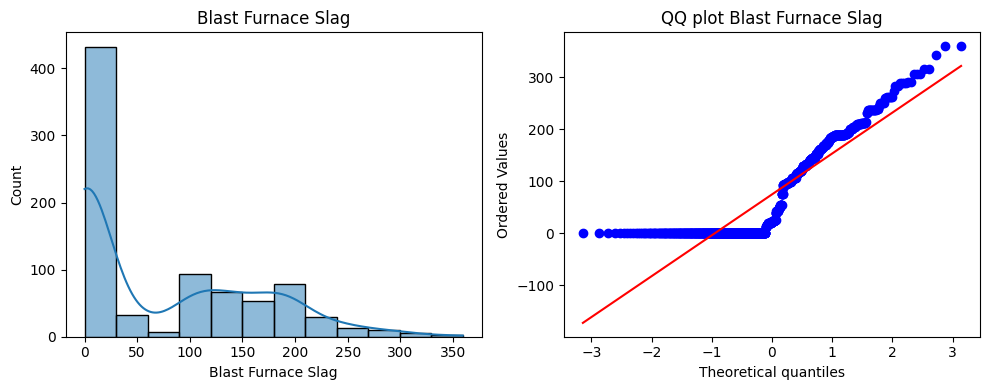

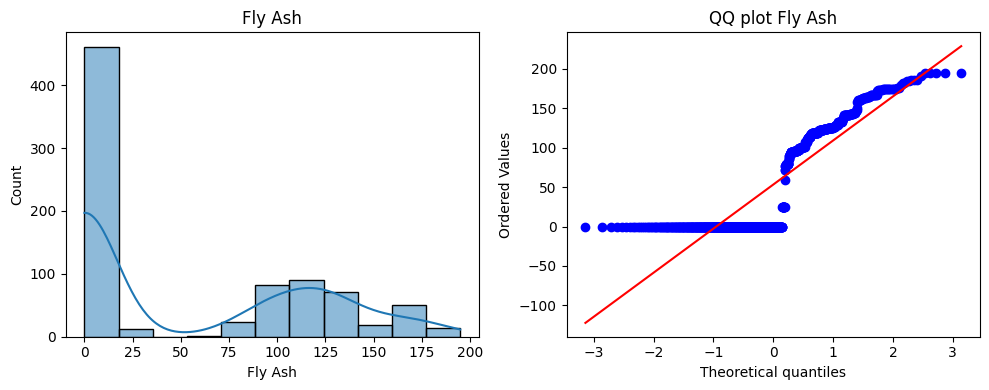

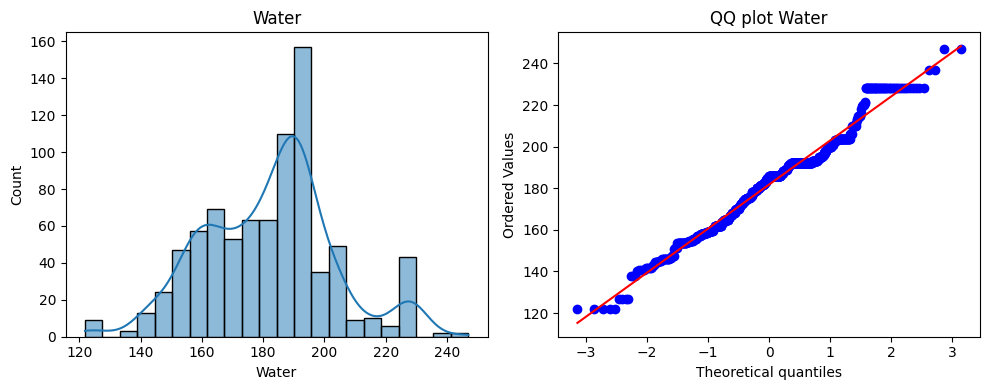

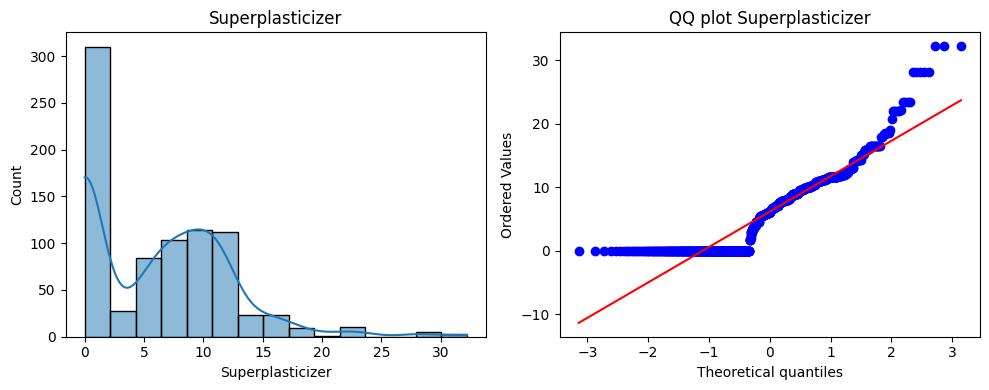

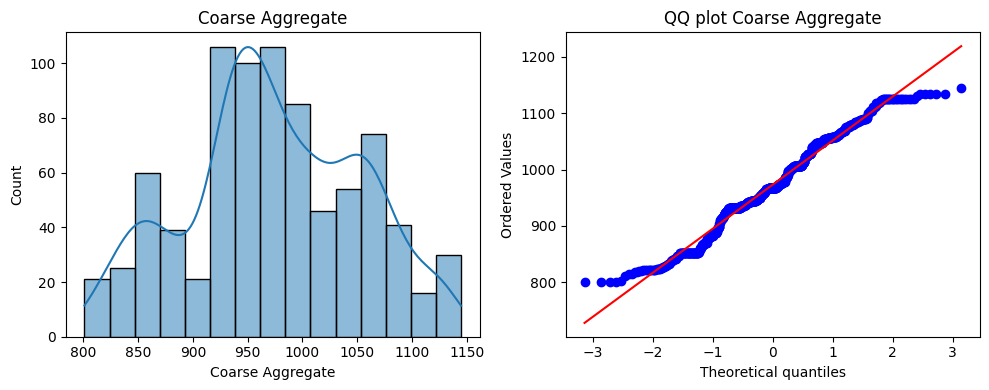

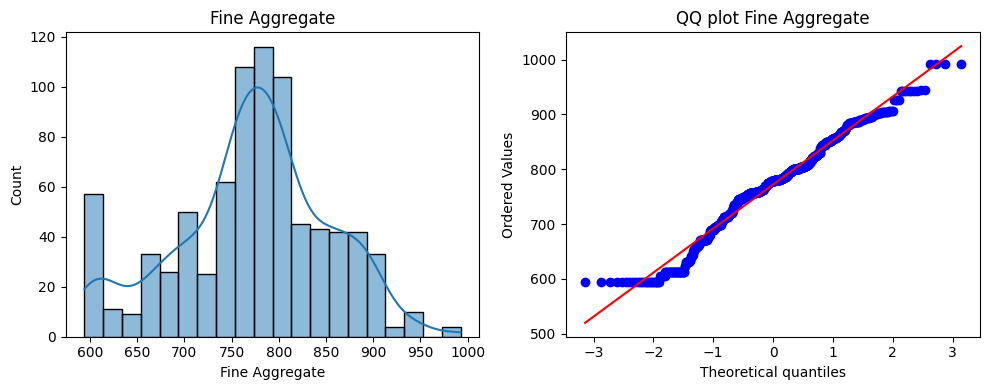

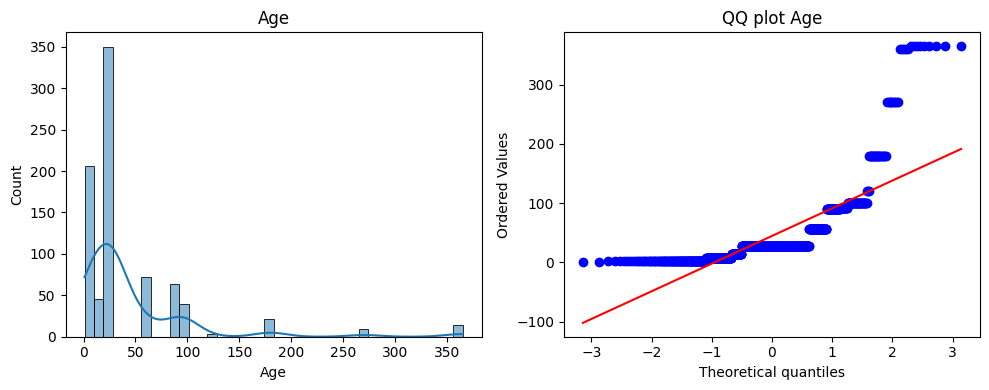

In [97]:
# comparing data with QQ plot

def plots(cols):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    sns.histplot(kde=True, data=x_train, x=cols,ax=axes[0])
    axes[0].set_title(f"{cols}")

    stats.probplot(x_train[cols], dist='norm', plot=plt)
    axes[1].set_title(f"QQ plot {cols}")

    plt.tight_layout()
    plt.show()

for cols in x_train:
    plots(cols)

In [47]:
clf = LinearRegression()
clf.fit(x_train_transformed, y_train)
pred = clf.predict(x_test_transformed)
print(r2_score(y_test, pred))

print(np.mean(cross_val_score(estimator=clf, X=x_train_transformed, y=y_train,scoring='r2')))

0.8047825011028631
0.7923976625497984


In [48]:
pd.DataFrame({'cols':x_train.columns, 'bc_lambda':bc.lambdas_})   # ----

,cols,bc_lambda
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


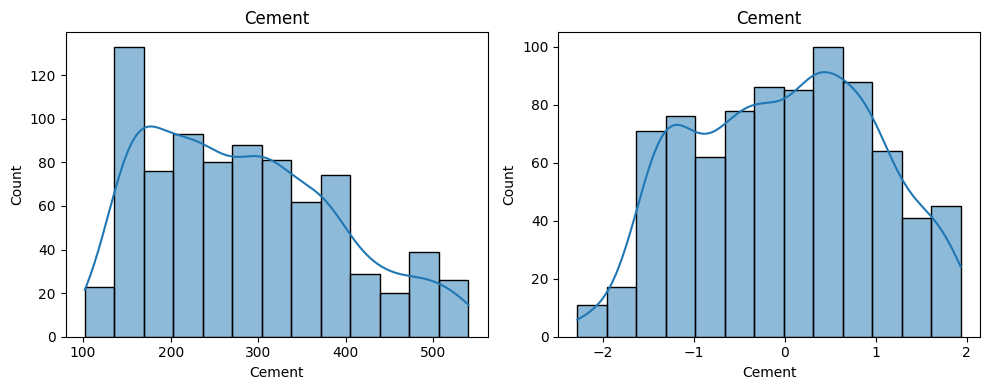

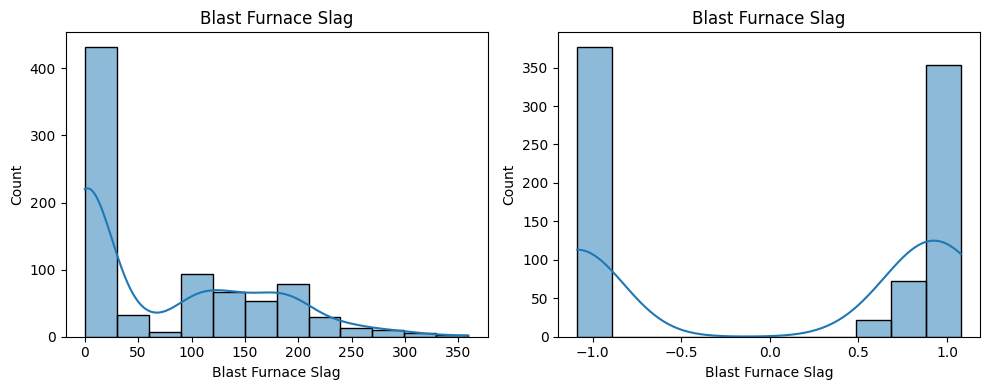

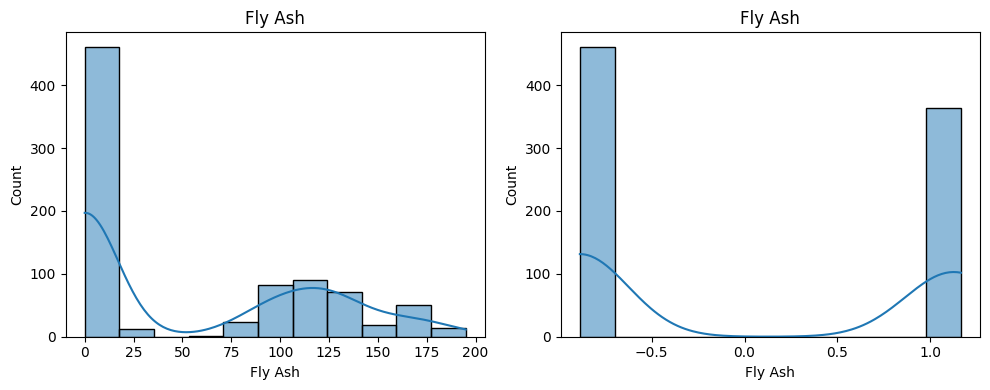

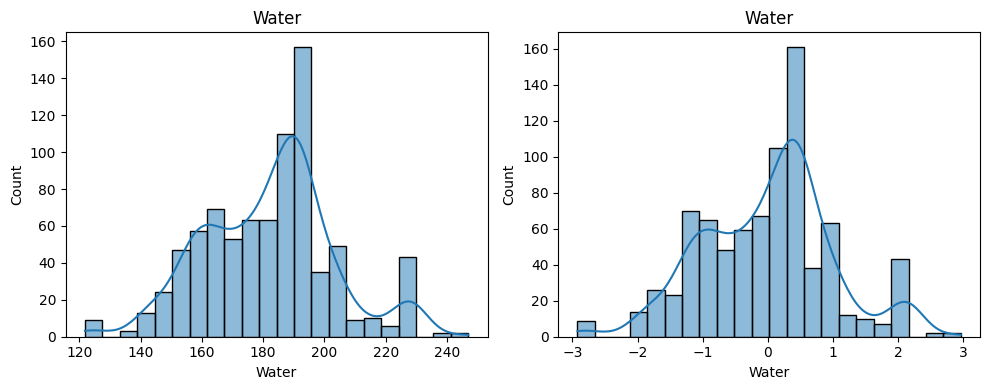

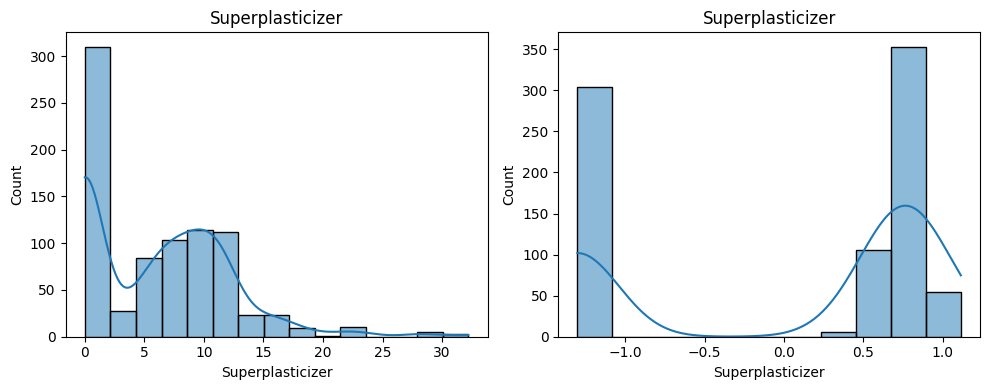

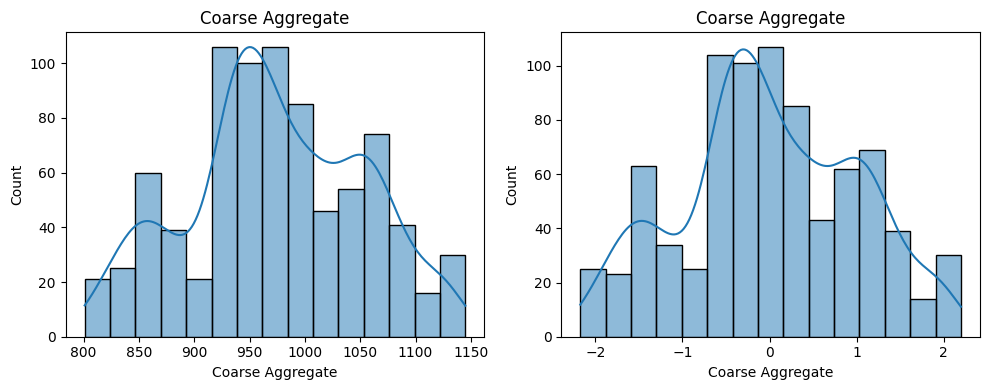

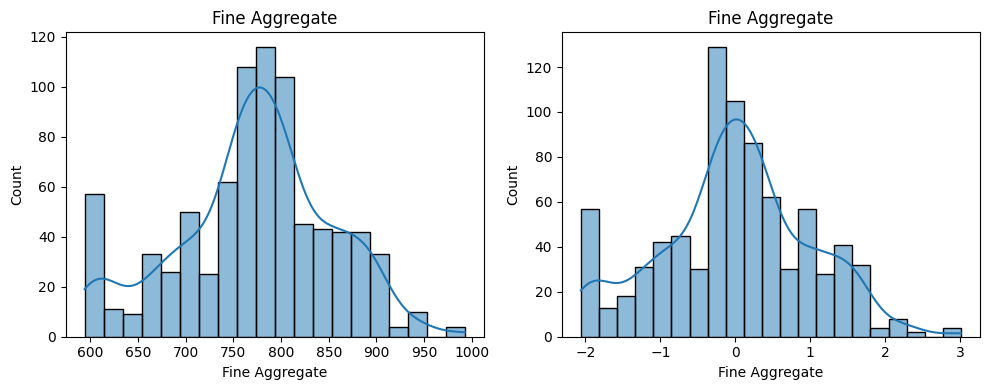

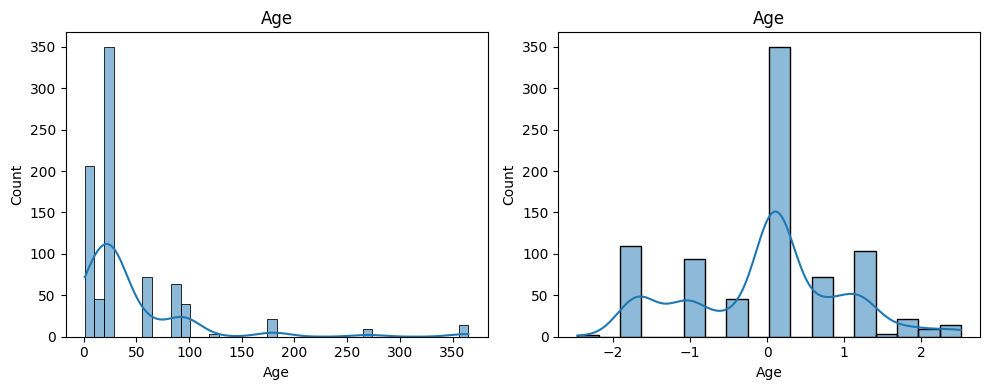

In [98]:
# comparing train and transformed data

plot_x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)

def plots(cols):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    sns.histplot(kde=True, data=x_train, x=cols,ax=axes[0])
    plt.title(cols)
    axes[0].set_title(f"{cols}")
    
    sns.histplot(kde=True, data=plot_x_train_transformed, x=cols,ax=axes[1])
    axes[0].set_title(f"{cols}")

    

    plt.tight_layout()
    plt.show()

for cols in plot_x_train_transformed:
    plots(cols)

In [45]:
# Applying Yeo - Johnson Transformer
clf = LinearRegression()

pt = PowerTransformer()
x_train_transformed = pt.fit_transform(x_train)
x_test_transformed = pt.transform(x_test)

clf.fit(x_train_transformed, y_train)
pred = clf.predict(x_test_transformed)
print(r2_score(y_test, pred))
print(np.mean(cross_val_score(estimator=clf, X=x_train_transformed, y=y_train, scoring='r2')))

0.8161906513354853
0.7941782182452176


In [50]:
pd.DataFrame({'cols': x_train.columns, 'BC': bc.lambdas_, 'YJ': pt.lambdas_})

,cols,BC,YJ
0,Cement,0.177025,0.174348
1,Blast Furnace Slag,0.025093,0.015715
2,Fly Ash,-0.038970,-0.161447
3,Water,0.772682,0.771307
4,Superplasticizer,0.098811,0.253935
5,Coarse Aggregate,1.129813,1.130050
6,Fine Aggregate,1.782018,1.783100
7,Age,0.066631,0.019885


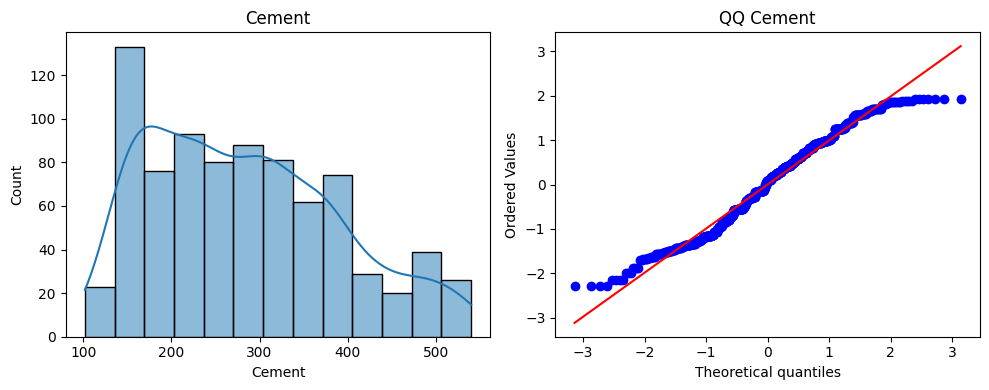

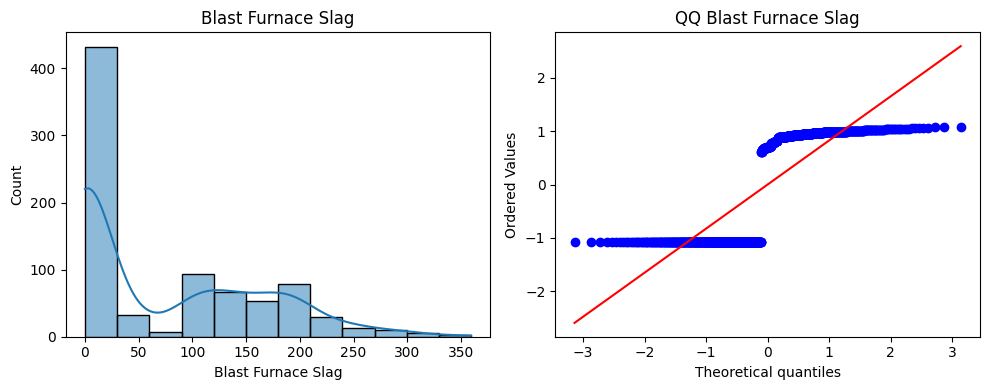

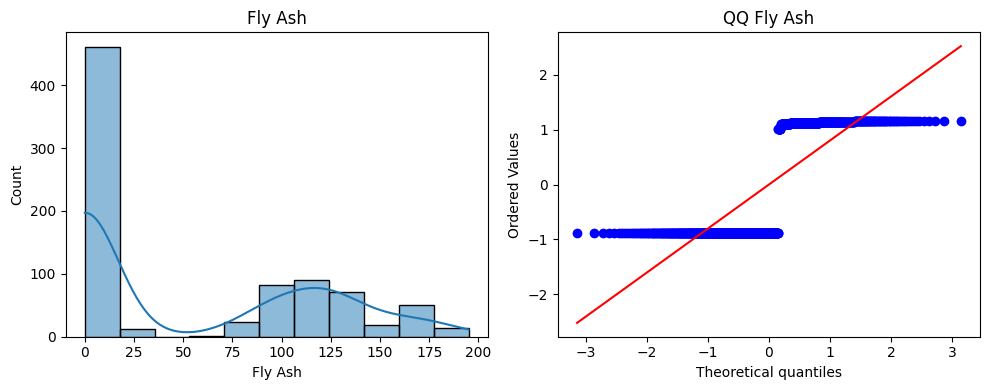

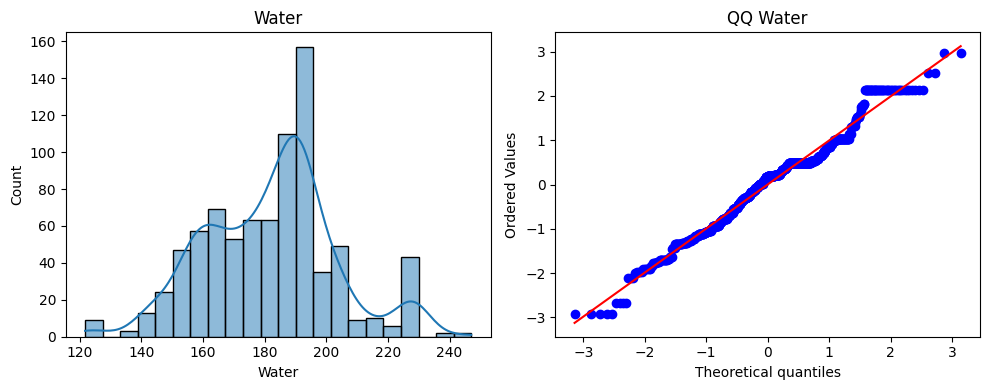

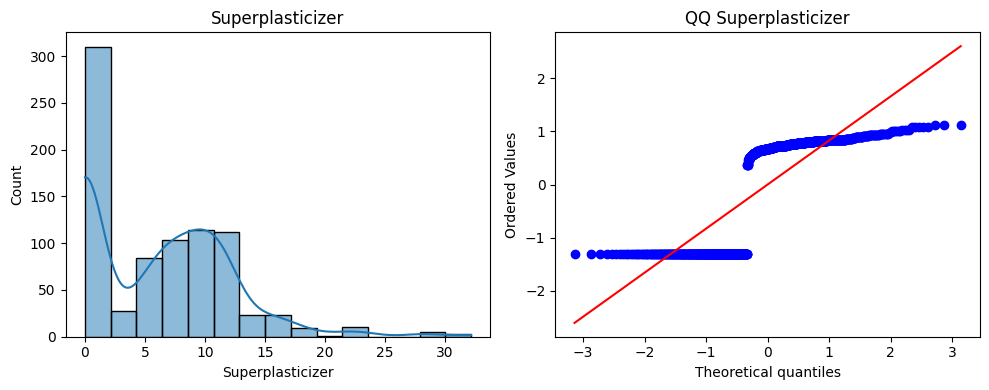

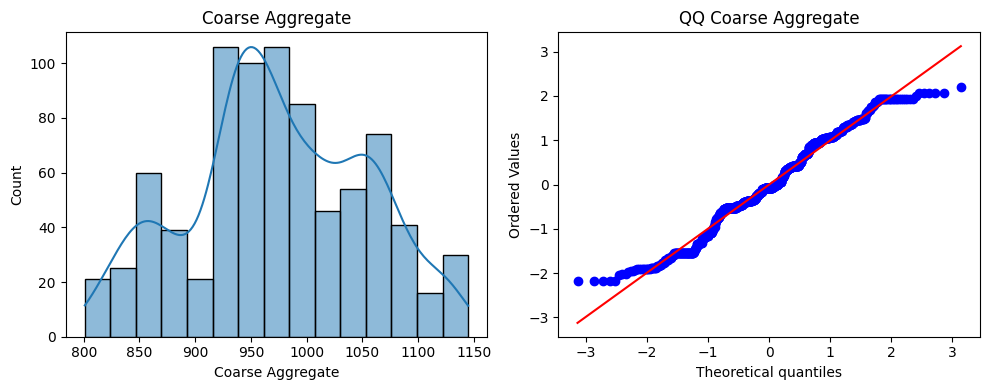

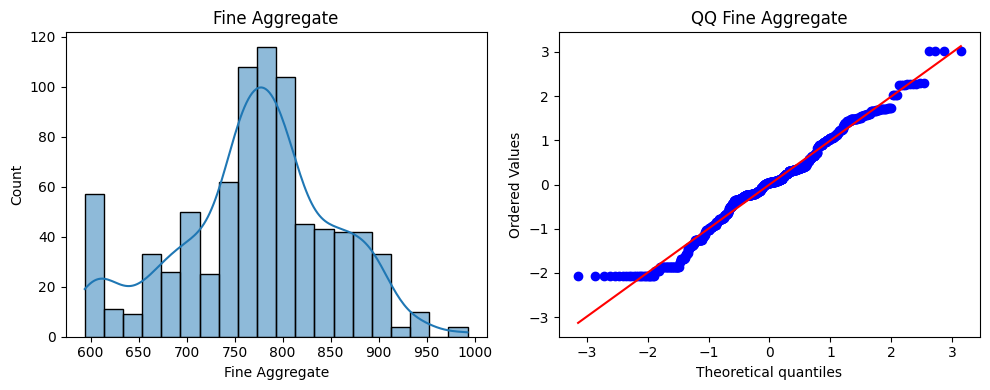

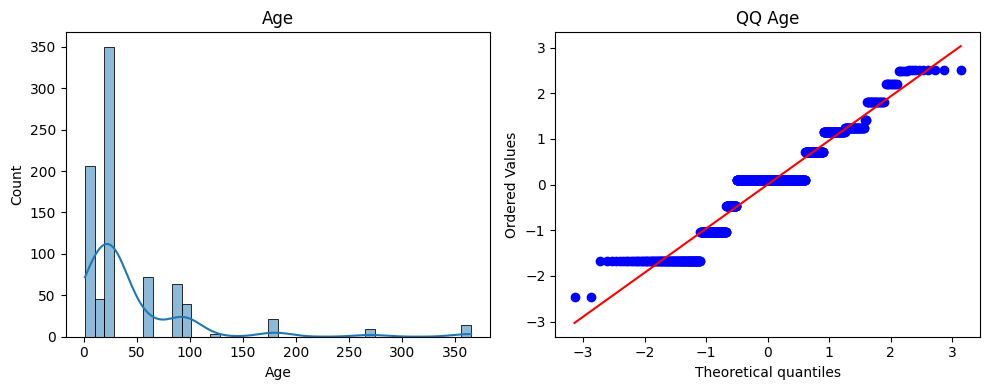

In [99]:
# comparing transformed and QQ plot

plot_x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)

def plots(cols):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    sns.histplot(kde=True, data=x_train, x=cols,ax=axes[0])
    # plt.title(cols)
    axes[0].set_title(f"{cols}")
    
    stats.probplot(plot_x_train_transformed[cols], dist='norm', plot=plt)
    axes[1].set_title(f"QQ {cols}")

    

    plt.tight_layout()
    plt.show()

for cols in plot_x_train_transformed:
    plots(cols)